<a href="https://colab.research.google.com/github/Handrum/ML_Equipo_6/blob/main/A2b_DL_TC5033_AD2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>
![Evidence 3](https://i.imgur.com/mu6ZuGT.jpg)

# **Master's in Applied Artificial Intelligence**
## **Course: Advanced Machine Learning Methods**
* ### **Lead Instructor**: José Antonio Cantoral Ceballos
* **Tutor**: Ana Bricia Galindo

## **Activity A2b: Building a CNN for CIFAR10 dataset using PyTorch Dataset**

*   --> Rafael Alexis Pinto Flórez | A01794500
*   --> Julio Baltazar Colín | A01794476
*   --> José Santiago Rueda Antonio | A01794118
*   --> Helmy Andrea Moreno Navarro | A01793918

# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
import torch.optim as optim
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [2]:
torch.cuda.is_available()

True

In [3]:
DATA_PATH = '/content/sample_data'
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)

train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)

val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

100%|██████████| 170498071/170498071 [00:02<00:00, 71936275.14it/s]


Extracting /content/sample_data/cifar-10-python.tar.gz to /content/sample_data
Files already downloaded and verified
Files already downloaded and verified


In [4]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/sample_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [5]:
train_loader.batch_size

64

In [6]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Se han truncado las últimas 5000 líneas del flujo de salida.
          [ 1.8412e+00,  1.7928e+00,  1.8089e+00,  ...,  1.7282e+00,
            1.7121e+00,  1.6960e+00]],

         [[ 1.7431e+00,  1.6830e+00,  1.6830e+00,  ...,  1.6680e+00,
            1.6530e+00,  1.6380e+00],
          [ 1.7882e+00,  1.7431e+00,  1.7431e+00,  ...,  1.7131e+00,
            1.6981e+00,  1.6830e+00],
          [ 1.7732e+00,  1.7281e+00,  1.7431e+00,  ...,  1.6981e+00,
            1.6830e+00,  1.6680e+00],
          ...,
          [ 1.8633e+00,  1.8183e+00,  1.8333e+00,  ...,  1.7131e+00,
            1.7582e+00,  1.7281e+00],
          [ 1.8784e+00,  1.8333e+00,  1.8483e+00,  ...,  1.7131e+00,
            1.7582e+00,  1.7431e+00],
          [ 1.8333e+00,  1.7882e+00,  1.8032e+00,  ...,  1.6680e+00,
            1.7131e+00,  1.6981e+00]]],


        [[[-1.8926e+00, -1.8767e+00, -1.8767e+00,  ..., -1.4798e+00,
           -1.7656e+00, -1.8291e+00],
          [-1.8767e+00, -1.8767e+00, -1.8767e+00,  ..., -3.500

### Using  GPUs

In [7]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Display Images

In [8]:
classes = test_loader.dataset.classes
def plot_figure(image):
    #The np.transpose(image, (1,2,0)) reshapes the image from PyTorch's channel-first format (C, H, W) to the channel-last format (H, W, C) expected by matplotlib.
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()


La imagen muestreada representa un: cat


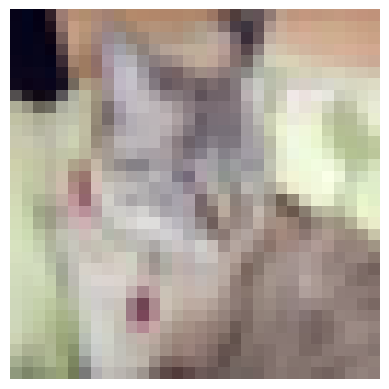

In [9]:
#show random image
rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)

In [10]:
#image size details
sample_image, _ = cifar10_train[0]
image_size = sample_image.size()
print(image_size)

torch.Size([3, 32, 32])


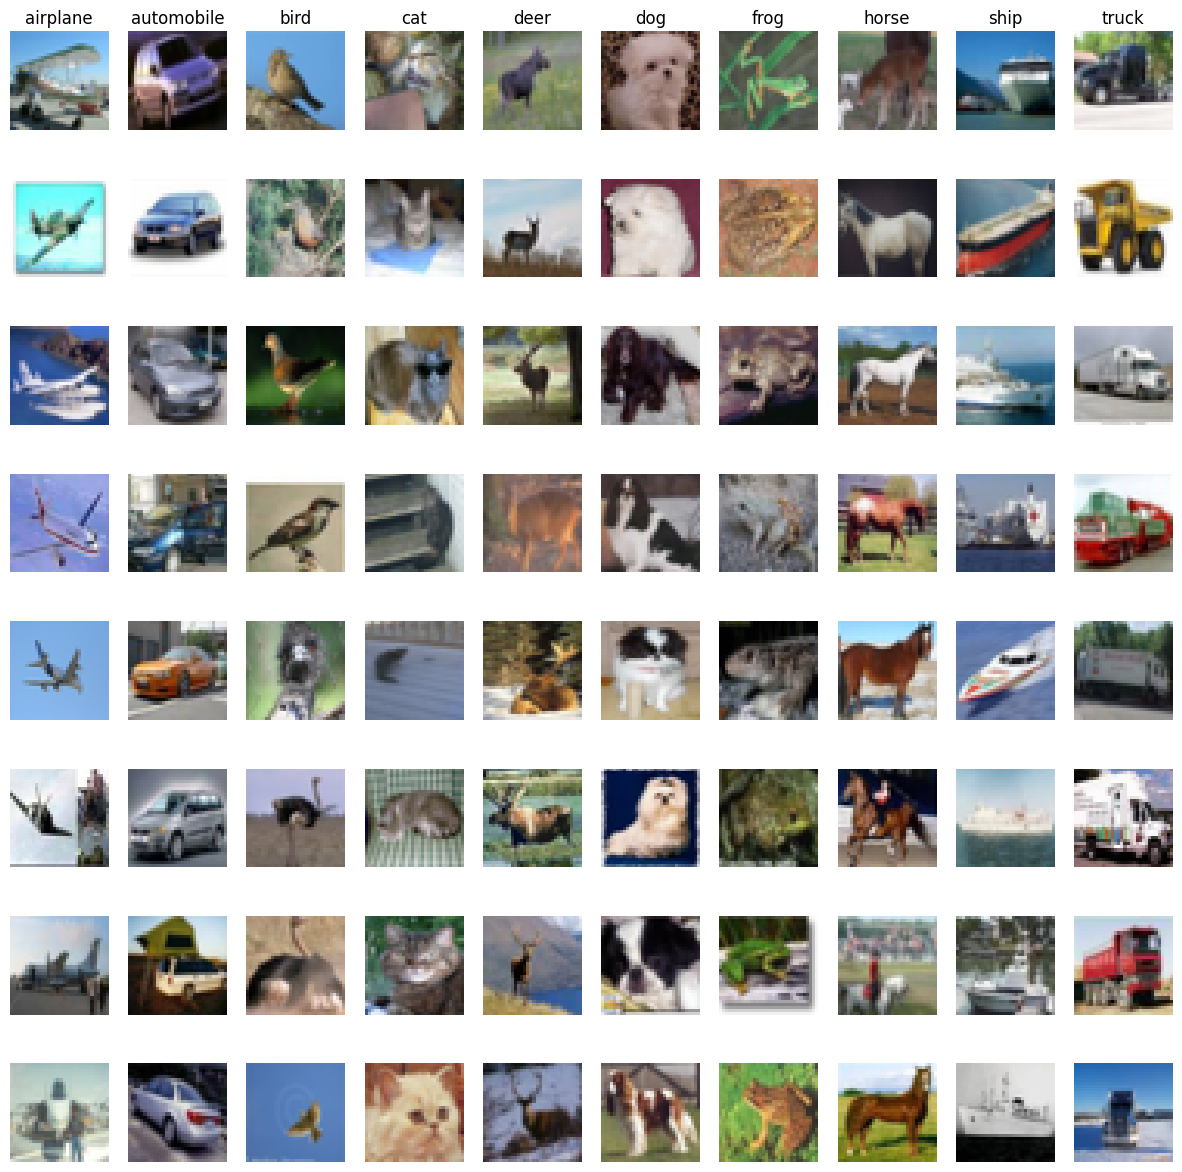

In [11]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calculate Accuracy



In [12]:
def accuracy(model, loader):
    correct  = 0
    total  = 0
    model.eval()
    model = model.to(device=device)
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images = images.to(device=device, dtype = torch.float32)
            labels = labels.to(device=device, dtype = torch.long)
            scores = model(images) # mb_size, 10
            _, pred = scores.max(dim=1) #pred shape (mb_size )
            correct += (pred == labels).sum() # pred shape (mb_size), yi shape (mb_size, 1)
            total += pred.size(0)
        return float(correct)/total


### Training Loop

In [13]:
def train(model, optimiser, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in enumerate(train_loader):
            model.train()
            images, labels = data
            images = images.to(device=device, dtype=torch.float32)
            labels = labels.to(device=device, dtype=torch.long)
            scores = model(images)

            cost = F.cross_entropy(input= scores, target=labels)

            optimiser.zero_grad()
            cost.backward()
            optimiser.step()

            running_loss += cost.item()  # Update running_loss

        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, cost: {running_loss / len(train_loader)}, accuracy: {acc * 100}%')
        #if i % MINIBATCH_SIZE == MINIBATCH_SIZE-1:  # print every mini-batches
        print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / MINIBATCH_SIZE))
        running_loss = 0.0  # Reset running_loss after printing

    print('Finished Training')



### Linear model

Linear Model with 3 ReLU Activation Layers and 1 Linear Output Layer.

In [14]:
#Linear model to have an initial baseline model
class LinearNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearNN, self).__init__()
        #model Definition
        self.model = nn.Sequential(
          nn.Flatten(), #Flaten the image to one dimension
          nn.Linear(in_features=input_size, out_features=200), # fully connected layer
          nn.ReLU(), #layer applies the Rectified Linear Unit (ReLU) activation function, which introduces non-linearity to the model.
          nn.Dropout(), #Layer introduces dropout, a regularization technique that randomly sets a fraction of input units to zero during training to reduce overfitting.
          nn.Linear(in_features=200, out_features=200), # fully connected layer
          nn.ReLU(),
          nn.Linear(in_features=200, out_features=output_size), # fully connected layer
          nn.ReLU(),
        )

    def forward(self, x):
        return self.model(x)

In [15]:
input_size = 32 * 32 * 3 #image size: torch.Size([3, 32, 32])
output_size =  10 # 10 classes
linear_model = LinearNN(input_size, output_size)


In [16]:
#Define the Optimizer
#using stochastic gradient descent
optimizer = optim.SGD(linear_model.parameters(), lr=1e-3)
train(linear_model, optimizer, epochs = 10)

Epoch: 0, cost: 2.275393936640161, accuracy: 21.26%
[1,   782] loss: 27.802
Epoch: 1, cost: 2.1994946624921714, accuracy: 26.900000000000002%
[2,   782] loss: 26.875
Epoch: 2, cost: 2.1218162733880455, accuracy: 29.84%
[3,   782] loss: 25.926
Epoch: 3, cost: 2.0600736981157755, accuracy: 32.1%
[4,   782] loss: 25.172
Epoch: 4, cost: 2.011449210936456, accuracy: 33.64%
[5,   782] loss: 24.577
Epoch: 5, cost: 1.975062433563535, accuracy: 35.02%
[6,   782] loss: 24.133
Epoch: 6, cost: 1.9459253758420725, accuracy: 36.18%
[7,   782] loss: 23.777
Epoch: 7, cost: 1.9060058752289208, accuracy: 36.66%
[8,   782] loss: 23.289
Epoch: 8, cost: 1.8660232929317542, accuracy: 37.7%
[9,   782] loss: 22.800
Epoch: 9, cost: 1.84050250175359, accuracy: 38.12%
[10,   782] loss: 22.489
Finished Training


In [17]:
print(f'Accuracy of the network with the test set is { accuracy(linear_model, test_loader):0.2%}' )

Accuracy of the network with the test set is 37.12%


### Sequential CNN

This is a CNN model with the following architecture:

1. Two Convolutional Layers with ReLU activation.
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
2. Batch Normalization between each convolutional layer.
3. MaxPooling with a 2x2 kernel.
4. A final Linear Layer with ReLU activation.

The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [18]:
class ConvolutionalNN(nn.Module):
    def __init__(self, input_channels, output_size):
        super(ConvolutionalNN, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=16, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, padding=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=32*16*16, out_features=output_size),  #32 channels * 16*16 inmage size
            nn.ReLU()
        )

    def forward(self, x):
        return self.model(x)

In [19]:
input_size = 3 #chanels
output_size =  10 # 10 classes
net = ConvolutionalNN(input_size,output_size)

In [20]:
#Define the Optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001)
train(net, optimizer, epochs=10)

Epoch: 0, cost: 1.5977888590539508, accuracy: 52.480000000000004%
[1,   782] loss: 19.523
Epoch: 1, cost: 1.26836070136341, accuracy: 56.940000000000005%
[2,   782] loss: 15.498
Epoch: 2, cost: 1.1442548820887075, accuracy: 58.160000000000004%
[3,   782] loss: 13.981
Epoch: 3, cost: 1.0556971308825267, accuracy: 62.480000000000004%
[4,   782] loss: 12.899
Epoch: 4, cost: 0.9817682786670792, accuracy: 63.6%
[5,   782] loss: 11.996
Epoch: 5, cost: 0.9222449395815124, accuracy: 62.96000000000001%
[6,   782] loss: 11.269
Epoch: 6, cost: 0.8762600914291714, accuracy: 65.48%
[7,   782] loss: 10.707
Epoch: 7, cost: 0.836090311217491, accuracy: 66.34%
[8,   782] loss: 10.216
Epoch: 8, cost: 0.8037072003954817, accuracy: 66.25999999999999%
[9,   782] loss: 9.820
Epoch: 9, cost: 0.7705364965493112, accuracy: 67.0%
[10,   782] loss: 9.415
Finished Training


In [21]:
print(f'Accuracy of the network with the test set is { accuracy(net, test_loader):0.2%}' )

Accuracy of the network with the test set is 64.58%


### Dynamic Sequential CNN

For ease of testing, a CNN model has been created that allows for the specification of the number and parameters of the CNN layers. It concludes with a final linear layer with ReLU activation for classification. Additionally, it includes a Batch Normalization layer between each convolutional layer and a 2x2 MaxPooling layer before the linear output.


In [22]:
class DynamicConvolutionalNN(nn.Module):
    def __init__(self, img_len, img_with, input_channels, output_size, conv_layer_specs):
        super(DynamicConvolutionalNN, self).__init__()

        conv_layers = []
        in_channels = input_channels

        for out_channels, kernel_size, padding in conv_layer_specs:
            # Add a convolutional layer
            conv_layers.append(nn.Conv2d(in_channels, out_channels, kernel_size, padding=padding))
            # Add ReLU activation for each layer
            conv_layers.append(nn.ReLU())
            # Add a Batch Normalization after each convolutional layer
            conv_layers.append(nn.BatchNorm2d(out_channels))
            # Update in_channels for the next layer
            in_channels = out_channels

        # Add a max pooling layer at the end and a flattening layer for the fully connected layer
        conv_layers.extend([
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        ])

        # Calculate the size of the linear layer's input
        # This requires a dummy input to compute the output size after convolutional layers
        # Sends dummy data and evaluates the layers so it can calculate the total outpult
        dummy_input = torch.randn(1, input_channels, img_len, img_with)  # Assuming 32x32 input size
        dummy_output = self.calc_cnn_out_size(dummy_input, conv_layers)
        linear_input_size = dummy_output.view(dummy_output.size(0), -1).size(1)

        # Add linear layer
        conv_layers.append(nn.Linear(linear_input_size, output_size))

        # Create the model
        self.model = nn.Sequential(*conv_layers)

    def calc_cnn_out_size(self, x, layers):
        #traverse all the layers in the model and get the final size of the output
        for layer in layers:
            x = layer(x)
        return x

    def forward(self, x):
        return self.model(x)

### Sequential CNN with 16 and 32 Channels

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 3.
   - Second layer with 32 channels and a kernel size of 3.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [23]:
conv_layer_specs = [(16, 3, 1), (32, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [24]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.5447108106844871, accuracy: 52.019999999999996%
[1,   782] loss: 18.874
Epoch: 1, cost: 1.2511733811529702, accuracy: 56.99999999999999%
[2,   782] loss: 15.288
Epoch: 2, cost: 1.1276234456950136, accuracy: 58.86%
[3,   782] loss: 13.778
Epoch: 3, cost: 1.046118927886114, accuracy: 60.540000000000006%
[4,   782] loss: 12.782
Epoch: 4, cost: 0.9864250528995339, accuracy: 61.919999999999995%
[5,   782] loss: 12.053
Epoch: 5, cost: 0.9343141259439766, accuracy: 63.32%
[6,   782] loss: 11.416
Epoch: 6, cost: 0.8925011238021314, accuracy: 64.12%
[7,   782] loss: 10.905
Epoch: 7, cost: 0.857161210168658, accuracy: 65.02%
[8,   782] loss: 10.473
Epoch: 8, cost: 0.827127215388181, accuracy: 65.5%
[9,   782] loss: 10.106
Epoch: 9, cost: 0.7976302813233622, accuracy: 64.5%
[10,   782] loss: 9.746
Finished Training


In [25]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 62.74%


### Sequential CNN with 16 and 32 Channels.

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [26]:
conv_layer_specs = [(16, 5, 2), (32, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [27]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.5245784928121835, accuracy: 51.94%
[1,   782] loss: 18.628
Epoch: 1, cost: 1.2119213632305565, accuracy: 57.9%
[2,   782] loss: 14.808
Epoch: 2, cost: 1.0819652960885822, accuracy: 61.019999999999996%
[3,   782] loss: 13.220
Epoch: 3, cost: 0.9893629683557984, accuracy: 62.12%
[4,   782] loss: 12.089
Epoch: 4, cost: 0.9254689567991535, accuracy: 62.53999999999999%
[5,   782] loss: 11.308
Epoch: 5, cost: 0.8737055706932112, accuracy: 64.48%
[6,   782] loss: 10.676
Epoch: 6, cost: 0.8347901950406906, accuracy: 66.2%
[7,   782] loss: 10.200
Epoch: 7, cost: 0.7999727050666614, accuracy: 65.72%
[8,   782] loss: 9.775
Epoch: 8, cost: 0.7698096704604985, accuracy: 65.92%
[9,   782] loss: 9.406
Epoch: 9, cost: 0.7434440652275329, accuracy: 67.72%
[10,   782] loss: 9.084
Finished Training


In [28]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 65.48%


### Sequential CNN with 32 and 64 Channels

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 32 channels and a kernel size of 3.
   - Second layer with 64 channels and a kernel size of 3.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [29]:
conv_layer_specs = [(32, 3, 1), (64, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [30]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.4532155048511828, accuracy: 53.5%
[1,   782] loss: 17.756
Epoch: 1, cost: 1.1390275092381041, accuracy: 57.36%
[2,   782] loss: 13.917
Epoch: 2, cost: 1.005670381247845, accuracy: 62.18%
[3,   782] loss: 12.288
Epoch: 3, cost: 0.9135219418941556, accuracy: 62.46000000000001%
[4,   782] loss: 11.162
Epoch: 4, cost: 0.8383386189980275, accuracy: 64.88000000000001%
[5,   782] loss: 10.243
Epoch: 5, cost: 0.7811456034174356, accuracy: 66.16%
[6,   782] loss: 9.545
Epoch: 6, cost: 0.7311308552389559, accuracy: 65.56%
[7,   782] loss: 8.934
Epoch: 7, cost: 0.6876039522535661, accuracy: 66.02%
[8,   782] loss: 8.402
Epoch: 8, cost: 0.6489108765064298, accuracy: 66.62%
[9,   782] loss: 7.929
Epoch: 9, cost: 0.6148132694423046, accuracy: 66.8%
[10,   782] loss: 7.512
Finished Training


In [31]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 64.90%


### Sequential CNN with 32 and 64 Channels

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 32 channels and a kernel size of 5.
   - Second layer with 64 channels and a kernel size of 5.

2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [32]:
conv_layer_specs = [(32, 5, 2), (64, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [33]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.4527411064528444, accuracy: 55.34%
[1,   782] loss: 17.751
Epoch: 1, cost: 1.1184930013268806, accuracy: 60.5%
[2,   782] loss: 13.667
Epoch: 2, cost: 0.9771812077221054, accuracy: 60.699999999999996%
[3,   782] loss: 11.940
Epoch: 3, cost: 0.8856746372969254, accuracy: 63.260000000000005%
[4,   782] loss: 10.822
Epoch: 4, cost: 0.8168990673768856, accuracy: 63.28%
[5,   782] loss: 9.981
Epoch: 5, cost: 0.7612294112629903, accuracy: 65.68%
[6,   782] loss: 9.301
Epoch: 6, cost: 0.712868833328452, accuracy: 65.9%
[7,   782] loss: 8.710
Epoch: 7, cost: 0.6687888654372881, accuracy: 64.36%
[8,   782] loss: 8.172
Epoch: 8, cost: 0.6317325079684977, accuracy: 65.7%
[9,   782] loss: 7.719
Epoch: 9, cost: 0.595812043608607, accuracy: 66.24%
[10,   782] loss: 7.280
Finished Training


In [34]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 65.60%



### Sequential CNN with 16, 32 and 64 Channels

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 3.
   - Second layer with 32 channels and a kernel size of 3.
   - Third layer with 64 channels and a kernel size of 3.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [35]:
conv_layer_specs = [(16, 3, 1), (32, 3, 1), (64, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [36]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.4431200732507974, accuracy: 56.36%
[1,   782] loss: 17.633
Epoch: 1, cost: 1.1086440076456046, accuracy: 58.540000000000006%
[2,   782] loss: 13.546
Epoch: 2, cost: 0.9629400705589968, accuracy: 59.0%
[3,   782] loss: 11.766
Epoch: 3, cost: 0.8656897965980612, accuracy: 63.32%
[4,   782] loss: 10.578
Epoch: 4, cost: 0.7876274429090188, accuracy: 64.24%
[5,   782] loss: 9.624
Epoch: 5, cost: 0.7248094669921928, accuracy: 64.66%
[6,   782] loss: 8.856
Epoch: 6, cost: 0.6729572671453666, accuracy: 65.60000000000001%
[7,   782] loss: 8.223
Epoch: 7, cost: 0.6260926749014184, accuracy: 65.46%
[8,   782] loss: 7.650
Epoch: 8, cost: 0.5825287734379854, accuracy: 66.46%
[9,   782] loss: 7.118
Epoch: 9, cost: 0.5446280314946723, accuracy: 65.84%
[10,   782] loss: 6.655
Finished Training


In [37]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 64.30%



### Sequential CNN with 16, 32 and 64 Channels

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
   - Third layer with 64 channels and a kernel size of 5.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [38]:
conv_layer_specs = [(16, 5, 2), (32, 5, 2), (64, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [39]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.7226774492074766, accuracy: 56.58%
[1,   782] loss: 21.049
Epoch: 1, cost: 1.1860828731980775, accuracy: 62.68%
[2,   782] loss: 14.492
Epoch: 2, cost: 0.9347228362889546, accuracy: 65.34%
[3,   782] loss: 11.421
Epoch: 3, cost: 0.7636441158135528, accuracy: 68.0%
[4,   782] loss: 9.331
Epoch: 4, cost: 0.640264760312217, accuracy: 67.10000000000001%
[5,   782] loss: 7.823
Epoch: 5, cost: 0.5457824462133906, accuracy: 70.04%
[6,   782] loss: 6.669
Epoch: 6, cost: 0.45864984332143194, accuracy: 69.34%
[7,   782] loss: 5.604
Epoch: 7, cost: 0.37957282833126194, accuracy: 70.32000000000001%
[8,   782] loss: 4.638
Epoch: 8, cost: 0.3093533288220615, accuracy: 69.78%
[9,   782] loss: 3.780
Epoch: 9, cost: 0.24786510025067707, accuracy: 70.04%
[10,   782] loss: 3.029
Finished Training


In [40]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 68.92%


### Sequential CNN with 16, 32, 64 and 128 Channels.

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 3.
   - Second layer with 32 channels and a kernel size of 3.
   - Third layer with 64 channels and a kernel size of 3.
   - Fourth layer with 128 channels and a kernel size of 3.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [41]:
conv_layer_specs = [(16, 3, 1), (32, 3, 1), (64, 3, 1), (128, 3, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)...]
model = DynamicConvolutionalNN(input_channels=3,  img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [42]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 1.412973587241624, accuracy: 55.44%
[1,   782] loss: 17.265
Epoch: 1, cost: 0.9992447562534791, accuracy: 58.599999999999994%
[2,   782] loss: 12.210
Epoch: 2, cost: 0.8142705843652911, accuracy: 60.81999999999999%
[3,   782] loss: 9.949
Epoch: 3, cost: 0.6893564249243578, accuracy: 63.9%
[4,   782] loss: 8.423
Epoch: 4, cost: 0.5889735515693875, accuracy: 61.94%
[5,   782] loss: 7.197
Epoch: 5, cost: 0.508703230382384, accuracy: 62.96000000000001%
[6,   782] loss: 6.216
Epoch: 6, cost: 0.4388769093491232, accuracy: 63.5%
[7,   782] loss: 5.363
Epoch: 7, cost: 0.3805938166425661, accuracy: 64.53999999999999%
[8,   782] loss: 4.650
Epoch: 8, cost: 0.3324669078945199, accuracy: 64.52%
[9,   782] loss: 4.062
Epoch: 9, cost: 0.28899639221789586, accuracy: 63.28%
[10,   782] loss: 3.531
Finished Training


In [43]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 62.42%


### Sequential CNN with 16, 32, 64 and 128 Channels.

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
   - Third layer with 64 channels and a kernel size of 5.
   - Fourth layer with 128 channels and a kernel size of 5.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Stochastic Gradient Descent (SGD).

In [44]:
conv_layer_specs = [(16, 5, 2), (32, 5, 2), (64, 5, 2), (128, 5, 2)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)...]
model = DynamicConvolutionalNN(input_channels=3, img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [45]:
#Define the Optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 2.7161131344183023, accuracy: 52.52%
[1,   782] loss: 33.188
Epoch: 1, cost: 1.7116947702282226, accuracy: 63.2%
[2,   782] loss: 20.915
Epoch: 2, cost: 1.2198574642086273, accuracy: 64.8%
[3,   782] loss: 14.905
Epoch: 3, cost: 0.8814942529972862, accuracy: 67.60000000000001%
[4,   782] loss: 10.771
Epoch: 4, cost: 0.6821911723336296, accuracy: 70.96000000000001%
[5,   782] loss: 8.336
Epoch: 5, cost: 0.5383456106609701, accuracy: 71.06%
[6,   782] loss: 6.578
Epoch: 6, cost: 0.40977378833629285, accuracy: 71.74000000000001%
[7,   782] loss: 5.007
Epoch: 7, cost: 0.30539851813860563, accuracy: 72.98%
[8,   782] loss: 3.732
Epoch: 8, cost: 0.21773878727918086, accuracy: 72.86%
[9,   782] loss: 2.660
Epoch: 9, cost: 0.14694563662895307, accuracy: 73.66%
[10,   782] loss: 1.795
Finished Training


In [46]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 73.36%


### Sequential CNN with 16, 32, 64 and 128 Channels.

This model consists of:

1. Two Convolutional Layers with ReLU activation and Batch Normalization between layers:
   - First layer with 16 channels and a kernel size of 5.
   - Second layer with 32 channels and a kernel size of 5.
   - Third layer with 64 channels and a kernel size of 5.
   - Fourth layer with 128 channels and a kernel size of 5.
2. MaxPooling with a 2x2 kernel.

3. A Fully Connected Linear Layer with ReLU activation.



The optimization algorithm used is Adaptive Moment Estimation (Adam).

In [47]:
conv_layer_specs = [(16, 5, 1), (32, 5, 1), (64, 5, 1), (128, 5, 1)]  # specifications of convolutional layers [(out_Chanels, kernel, padding), (out_Chanels, kernel, padding)...]
model = DynamicConvolutionalNN(input_channels=3,  img_len=32, img_with=32, output_size=10, conv_layer_specs=conv_layer_specs)

In [48]:
#Define the Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, optimizer, epochs=10)

Epoch: 0, cost: 2.7783765042834268, accuracy: 47.64%
[1,   782] loss: 33.948
Epoch: 1, cost: 1.555752627303838, accuracy: 59.88%
[2,   782] loss: 19.009
Epoch: 2, cost: 1.0324356937804795, accuracy: 65.7%
[3,   782] loss: 12.615
Epoch: 3, cost: 0.8315818283106665, accuracy: 69.08%
[4,   782] loss: 10.161
Epoch: 4, cost: 0.7277078684943411, accuracy: 70.86%
[5,   782] loss: 8.892
Epoch: 5, cost: 0.6311587070869973, accuracy: 71.39999999999999%
[6,   782] loss: 7.712
Epoch: 6, cost: 0.5464614342012064, accuracy: 71.12%
[7,   782] loss: 6.677
Epoch: 7, cost: 0.46916654953718795, accuracy: 72.18%
[8,   782] loss: 5.733
Epoch: 8, cost: 0.38948158008973005, accuracy: 71.34%
[9,   782] loss: 4.759
Epoch: 9, cost: 0.3234012007160717, accuracy: 70.67999999999999%
[10,   782] loss: 3.952
Finished Training


In [49]:
print(f'Accuracy of the network with the test set is { accuracy(model, test_loader):0.2%}' )

Accuracy of the network with the test set is 70.98%


### Conclusions

In summary, the results of the experiments indicate the following:

- The linear model with three layers achieved a maximum of between 52.9% and 54.22% accuracy.

- The convolutional models outperformed these results, achieving a range between 65% and 70% accuracy.

- The SGD optimizer (Stochastic Gradient Descent) was used for all models, and the Adam optimizer (Adaptive Moment Estimation) was employed in the last model, which yielded the best results, although a significant improvement in accuracy was not observed.

- The learning rate was kept constant at 0.001 for all models.

- Models with a kernel size of 5 outperformed those with a kernel size of 3 in terms of performance.

- As the number of convolutional layers was increased and the number of channels was raised, improvements in accuracy were obtained, albeit at a higher computational cost.

- The optimal value might be found with 3 convolutional layers and a maximum of 64 channels.

In conclusion, for this dataset, convolutional models with two convolutional layers and 64 channels, using a kernel size of 5, along with the SGD optimizer and a learning rate of 0.001, proved to be the most effective in terms of accuracy and computational efficiency.
